In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data_sets/preprocessed_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69933 entries, 0 to 69932
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 69933 non-null  float64
 1   longitude                69933 non-null  float64
 2   nearest_mrt_dist         69933 non-null  float64
 3   nearest_mall_dist        69933 non-null  float64
 4   nearest_govt_aided_dist  69933 non-null  float64
 5   nearest_funded_dist      69933 non-null  float64
 6   nearest_sap_dist         69933 non-null  float64
 7   floor_area_sqm           69933 non-null  float64
 8   resale_price             69933 non-null  float64
 9   lease_commence_date      69933 non-null  int64  
 10  price_per_sqft           69933 non-null  float64
 11  lease_remain_years       69933 non-null  int64  
 12  flat_type_mapped         69933 non-null  int64  
 13  storey_mean              69933 non-null  float64
 14  town_BEDOK            

In [4]:
data.columns

Index(['latitude', 'longitude', 'nearest_mrt_dist', 'nearest_mall_dist',
       'nearest_govt_aided_dist', 'nearest_funded_dist', 'nearest_sap_dist',
       'floor_area_sqm', 'resale_price', 'lease_commence_date',
       'price_per_sqft', 'lease_remain_years', 'flat_type_mapped',
       'storey_mean', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN'],
      dtype='object')

## Train, Test, Split

#### Import Evaluation Metrics for ML Modls

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

### Initialize lists to collect evaluation metrics for comparison later

In [6]:
model_mse_score = []
model_cv_score = []

In [7]:
# Train, test, splot
X = data[['latitude', 'longitude', 'nearest_mrt_dist', 'nearest_mall_dist',
       'nearest_govt_aided_dist', 'nearest_funded_dist', 'nearest_sap_dist',
       'lease_remain_years', 'flat_type_mapped', 'storey_mean', 
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN']]

y = data['price_per_sqft']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm_reg = LinearRegression().fit(X, y)

### Linear Regression Model Evaluation MSE

In [10]:
# Compute y_pred_lm
y_pred_lm = lm_reg.predict(X_test)

# Compute rmse_lm
mse_lm = MSE(y_test, y_pred_lm)

# Compute rmse_lm
rmse_lm = mse_lm**(1/2)

# Print rmse_lm
print("Test set RMSE of Linear Regression: {:.2f}".format(rmse_lm))

# Append to mse list
model_mse_score.append({'Linear Regression': rmse_lm})

Test set RMSE of Linear Regression: 48.53


In [11]:
lm_feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coef_": lm_reg.coef_
})

In [12]:
lm_feature_importance.head()

,feature,coef_
0,latitude,-1196.963961
1,longitude,-470.223027
2,nearest_mrt_dist,-0.054730
3,nearest_mall_dist,-0.020699
4,nearest_govt_aided_dist,-0.006390


### 10-Fold Validation: Linear Regression

In [13]:
lm_cv_scores = cross_val_score(lm_reg, X, y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold cross-validation scores
print(lm_cv_scores)
lm_cv_score_rmse = abs(lm_cv_scores)**(1/2)
print(lm_cv_score_rmse)

print("Average 10-Fold CV Score: {}".format(np.mean(lm_cv_score_rmse)))

[-2784.94507034 -2160.64649382 -2159.55523842 -2570.40836791
 -2405.65239346 -2168.49795514 -2343.18624227 -2345.4478063
 -2075.17787729 -2871.55764648]
[52.77257877 46.4827548  46.47101504 50.69919494 49.04745043 46.56713385
 48.40646901 48.42982352 45.55412031 53.58691675]
Average 10-Fold CV Score: 48.801745742300774


In [14]:
model_cv_score.append({"Linear Regression": np.mean(lm_cv_score_rmse)})

## Regression Tree

In [15]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

In [16]:
rt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
rt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

### Regression Tree Model Evaluation MSE

In [17]:
# Compute y_pred
y_pred_rt = rt.predict(X_test)

# Compute mse_dt
mse_rt = MSE(y_test, y_pred_rt)

# Compute rmse_dt
rmse_rt = mse_rt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_rt))

model_mse_score.append({"Regression Tree": rmse_rt})

Test set RMSE of dt: 82.11


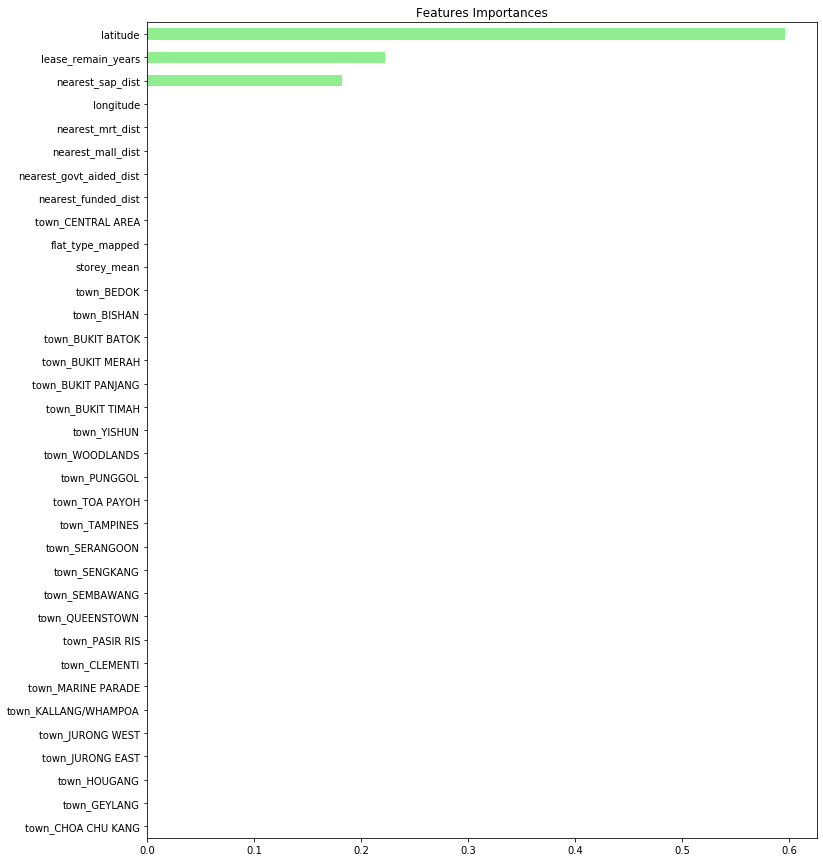

In [18]:
# Create a pd.Series of features importances
rt_importances = pd.Series(data=rt.feature_importances_,
                        index= X_train.columns)

# Sort importances
rt_importances_sorted = rt_importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(12,15))
rt_importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [19]:
rt_cv_scores = cross_val_score(rt, X, y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold cross-validation scores
print(rt_cv_scores)
rt_cv_score_rmse = abs(rt_cv_scores)**(1/2)
print(rt_cv_score_rmse)

print("Average 10-Fold CV Score: {}".format(np.mean(rt_cv_score_rmse)))

model_cv_score.append({"Regression Tree": np.mean(rt_cv_score_rmse)})

[-9835.15192266 -7799.16558715 -5958.7831188  -7897.69845875
 -5421.84181695 -5383.80884889 -8048.01152959 -6498.84194893
 -4555.43798483 -6776.44443903]
[99.17233446 88.3128846  77.19315461 88.86899605 73.63315705 73.37444275
 89.71071023 80.61539524 67.4939848  82.31916204]
Average 10-Fold CV Score: 82.0694221833472


## Random Forest Regression

In [20]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

### Random Forest Regressior Model Evaluation MSE

In [21]:
# Predict the test set labels
y_pred_rf = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test_rf = (MSE(y_test, y_pred_rf))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_rf))

Test set RMSE of rf: 28.25


In [22]:
model_mse_score.append({"Random Forest Regression": rmse_test_rf })

### Feature Importance

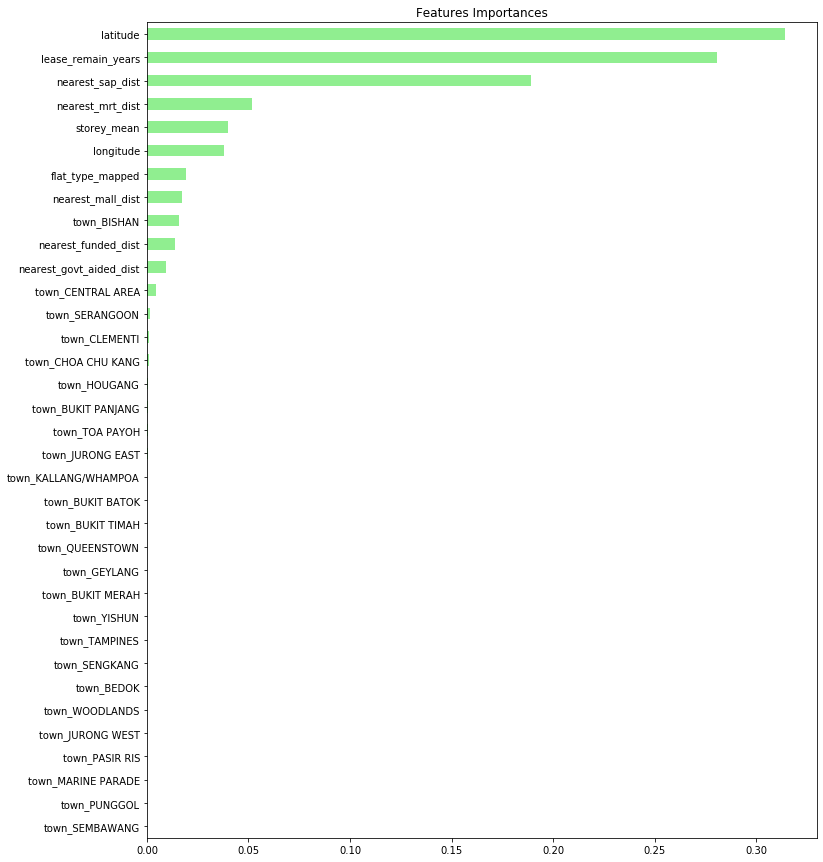

In [23]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(12,15))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [24]:
rf_cv_scores = cross_val_score(rf, X, y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold cross-validation scores
print(rf_cv_scores)
lm_rf_score_rmse = abs(rf_cv_scores)**(1/2)
print(lm_rf_score_rmse)

print("Average 10-Fold CV Score: {}".format(np.mean(lm_rf_score_rmse)))


[-1217.76817769  -998.57959611  -940.56911793 -1166.91798771
  -984.5547      -930.58534029  -936.65476218  -907.55177355
  -856.76947749 -2996.28375029]
[34.89653533 31.60031006 30.66869932 34.16018132 31.37761463 30.50549689
 30.604816   30.12559997 29.27062482 54.73832067]
Average 10-Fold CV Score: 33.79481990081914


In [25]:
model_cv_score.append({"Random Forest Regression": np.mean(lm_rf_score_rmse)})

## XGBoost Model

In [26]:
# Import xgboost
import xgboost as xgb

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:squarederror",n_estimator=10,seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

[20:44:40] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=10, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost Model Evaluation

In [27]:
# Predict the labels of the test set: preds
pred_xgb = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse_test_xgb =(MSE(y_test, pred_xgb))**(1/2)
print("RMSE: %f" % (rmse_test_xgb))

model_mse_score.append({"XGBoost Regression": np.mean(rmse_test_xgb)})

RMSE: 27.552751


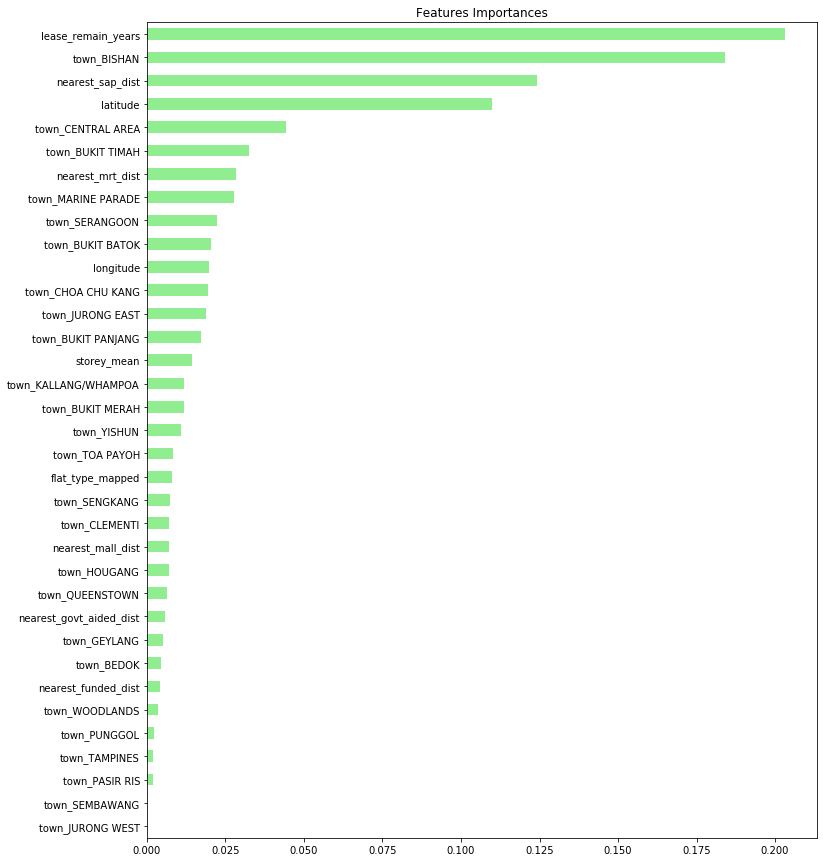

In [28]:
# Create a pd.Series of features importances
xgb_importances = pd.Series(data=xg_reg.feature_importances_,
                        index= X_train.columns)

# Sort importances
xgb_importances_sorted = xgb_importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(12,15))
xgb_importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [29]:
xgb_cv_scores = cross_val_score(xg_reg, X, y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold cross-validation scores
print(xgb_cv_scores)
lm_xgb_score_rmse = abs(xgb_cv_scores)**(1/2)
print(lm_xgb_score_rmse)

print("Average 10-Fold CV Score: {}".format(np.mean(lm_xgb_score_rmse)))

model_cv_score.append({"XGBoost Regression": np.mean(lm_xgb_score_rmse)})

[20:44:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:55] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you fin

In [30]:
model_mse_score

[{'Linear Regression': 48.52809045014751},
 {'Regression Tree': 82.11078196139924},
 {'Random Forest Regression': 28.246299300362804},
 {'XGBoost Regression': 27.55275065985854}]

In [31]:
model_cv_score

[{'Linear Regression': 48.801745742300774},
 {'Regression Tree': 82.0694221833472},
 {'Random Forest Regression': 33.79481990081914},
 {'XGBoost Regression': 32.94926835936759}]